In [1]:
import numpy as np

In [2]:
from PIL import Image
image = Image.open('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')

In [3]:
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

JPEG
(360, 363)
RGB


uint8
(363, 360, 3)


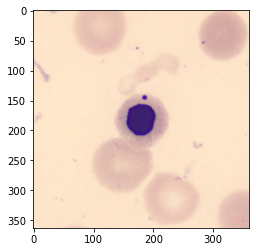

In [5]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [6]:
# load the image
image = Image.open('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')
# convert image to numpy array
data =np.asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)


<class 'numpy.ndarray'>
(363, 360, 3)
<class 'PIL.Image.Image'>
RGB
(360, 363)


In [7]:
from os import listdir
from os.path import isfile, join
import pandas as pd
##### Récupération du chemin d'accès des images

files = []
ids = []
labels = []

path_gen = r"/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB"
path_loc = [r"/basophil",r"/eosinophil",r"/erythroblast",r"/ig",
            r"/lymphocyte",r"/monocyte",r"/neutrophil",r"/platelet"]

for x in path_loc:
    path = path_gen + x
    files.extend([join(path, f)  for f in listdir(path)])

##### Création d'un DataFrame
df = pd.DataFrame(columns = ["path", "id", "label"])

df["path"] = files
df["id"] = df["path"].apply(lambda x : x.split('_')[4][:-4])
df["label"] = df["path"].apply(lambda x : x.split('_')[3].split('/')[-1])

## Attention, certaines images ont le même id

In [8]:
# Fusion des "sous-classes" : MY, MMY, BNE & PMY => IG  ;  NEUTROPHIL => SNE
df["label"] = df["label"].replace(to_replace = ["BNE","NEUTROPHIL","MY","MMY","PMY"], 
                                  value = ["IG","SNE","IG","IG","IG"])
df = df[df['label'] != '.DS']
# Décompte des cellules par catégories
print(df["label"].value_counts())

# Stockage de chacun des 8 labels dans la liste classes
classes = df["label"].value_counts().index.to_list()
pd.set_option('display.max_colwidth', None)# Aperçu du DataFrame
df.head()

IG          4528
EO          3117
PLATELET    2348
SNE         1696
ERB         1551
MO          1420
BA          1218
LY          1214
Name: label, dtype: int64


,path,id,label
0,/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/basophil/BA_689200.jpg,689200,BA
1,/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/basophil/BA_883452.jpg,883452,BA
2,/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/basophil/BA_382161.jpg,382161,BA
3,/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/basophil/BA_175579.jpg,175579,BA
4,/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/basophil/BA_775722.jpg,775722,BA


In [9]:
df["label"].value_counts()

IG          4528
EO          3117
PLATELET    2348
SNE         1696
ERB         1551
MO          1420
BA          1218
LY          1214
Name: label, dtype: int64

In [14]:
sample = df.groupby('label').apply(lambda x: x.sample(n=300)).reset_index(drop = True)
sample.label.value_counts()




MO          300
IG          300
ERB         300
BA          300
LY          300
PLATELET    300
SNE         300
EO          300
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

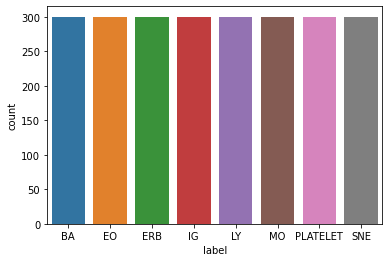

In [15]:
import seaborn as sns
sns.countplot(x=sample.label)

In [16]:
np_data = []
np.random
for i in sample['path']:
    img = np.asarray(Image.open(i).resize((363,360)).convert('L')).reshape(-1)
    np_data.append(img)

In [17]:
np.array(np_data).shape

(2400, 130680)

In [18]:
np_data[0]

array([228, 228, 229, ..., 230, 231, 233], dtype=uint8)

In [19]:
np_feats = np.transpose(np_data)

In [20]:
df_data = pd.DataFrame(np_feats)

In [21]:
df_data = df_data.transpose()

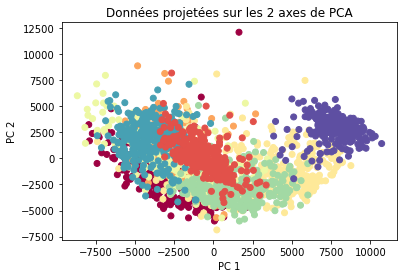

<Figure size 432x288 with 0 Axes>

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
target = sample.label.replace({'BA':0, 'SNE':1, 'EO':2, 'ERB':3, 'IG':4, 'LY':5, 'MO':6, 'PLATELET':7})
pca = PCA(n_components = 0.9)
X_pca = pca.fit_transform(df_data)
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

fig = plt.figure()





In [24]:
from matplotlib.image import imread
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    model_ = model(n_components = 0.9)
    proj = model_.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.b')
    
   

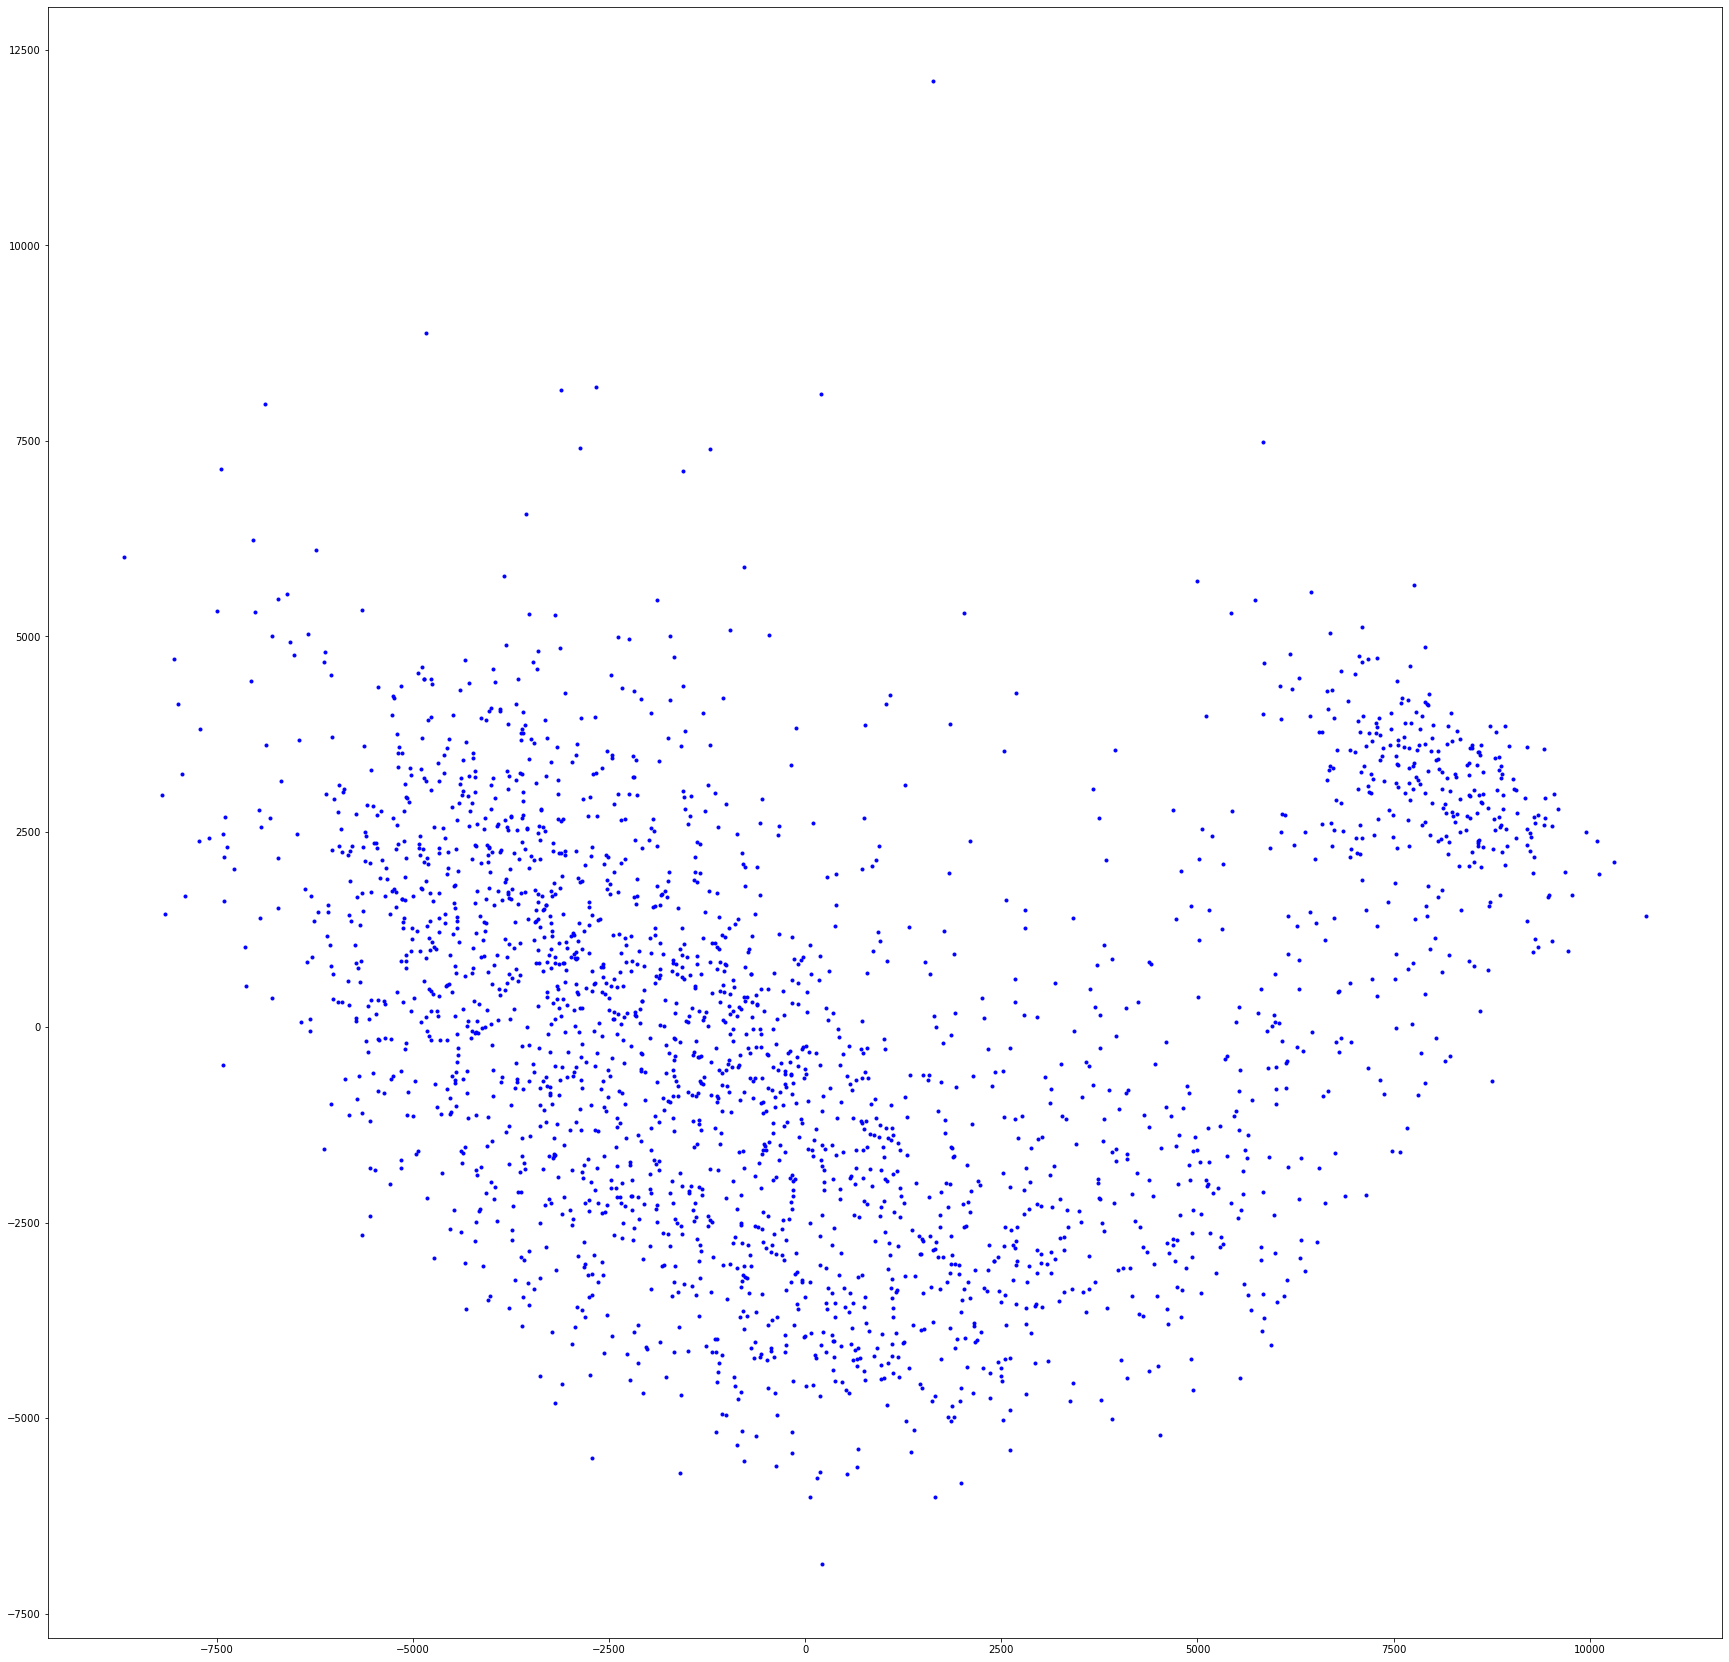

In [25]:
fig, ax = plt.subplots(figsize=(30, 30))


plot_components(df_data, PCA, images=np.array(np_data).reshape((-1, 363, 360)),cmap='gray',thumb_frac=.1)

In [26]:
sample['X'] = X_pca[:, 0]
sample['Y'] = X_pca[:, 1]

In [27]:
sample2 = sample.sample(frac=0.05)

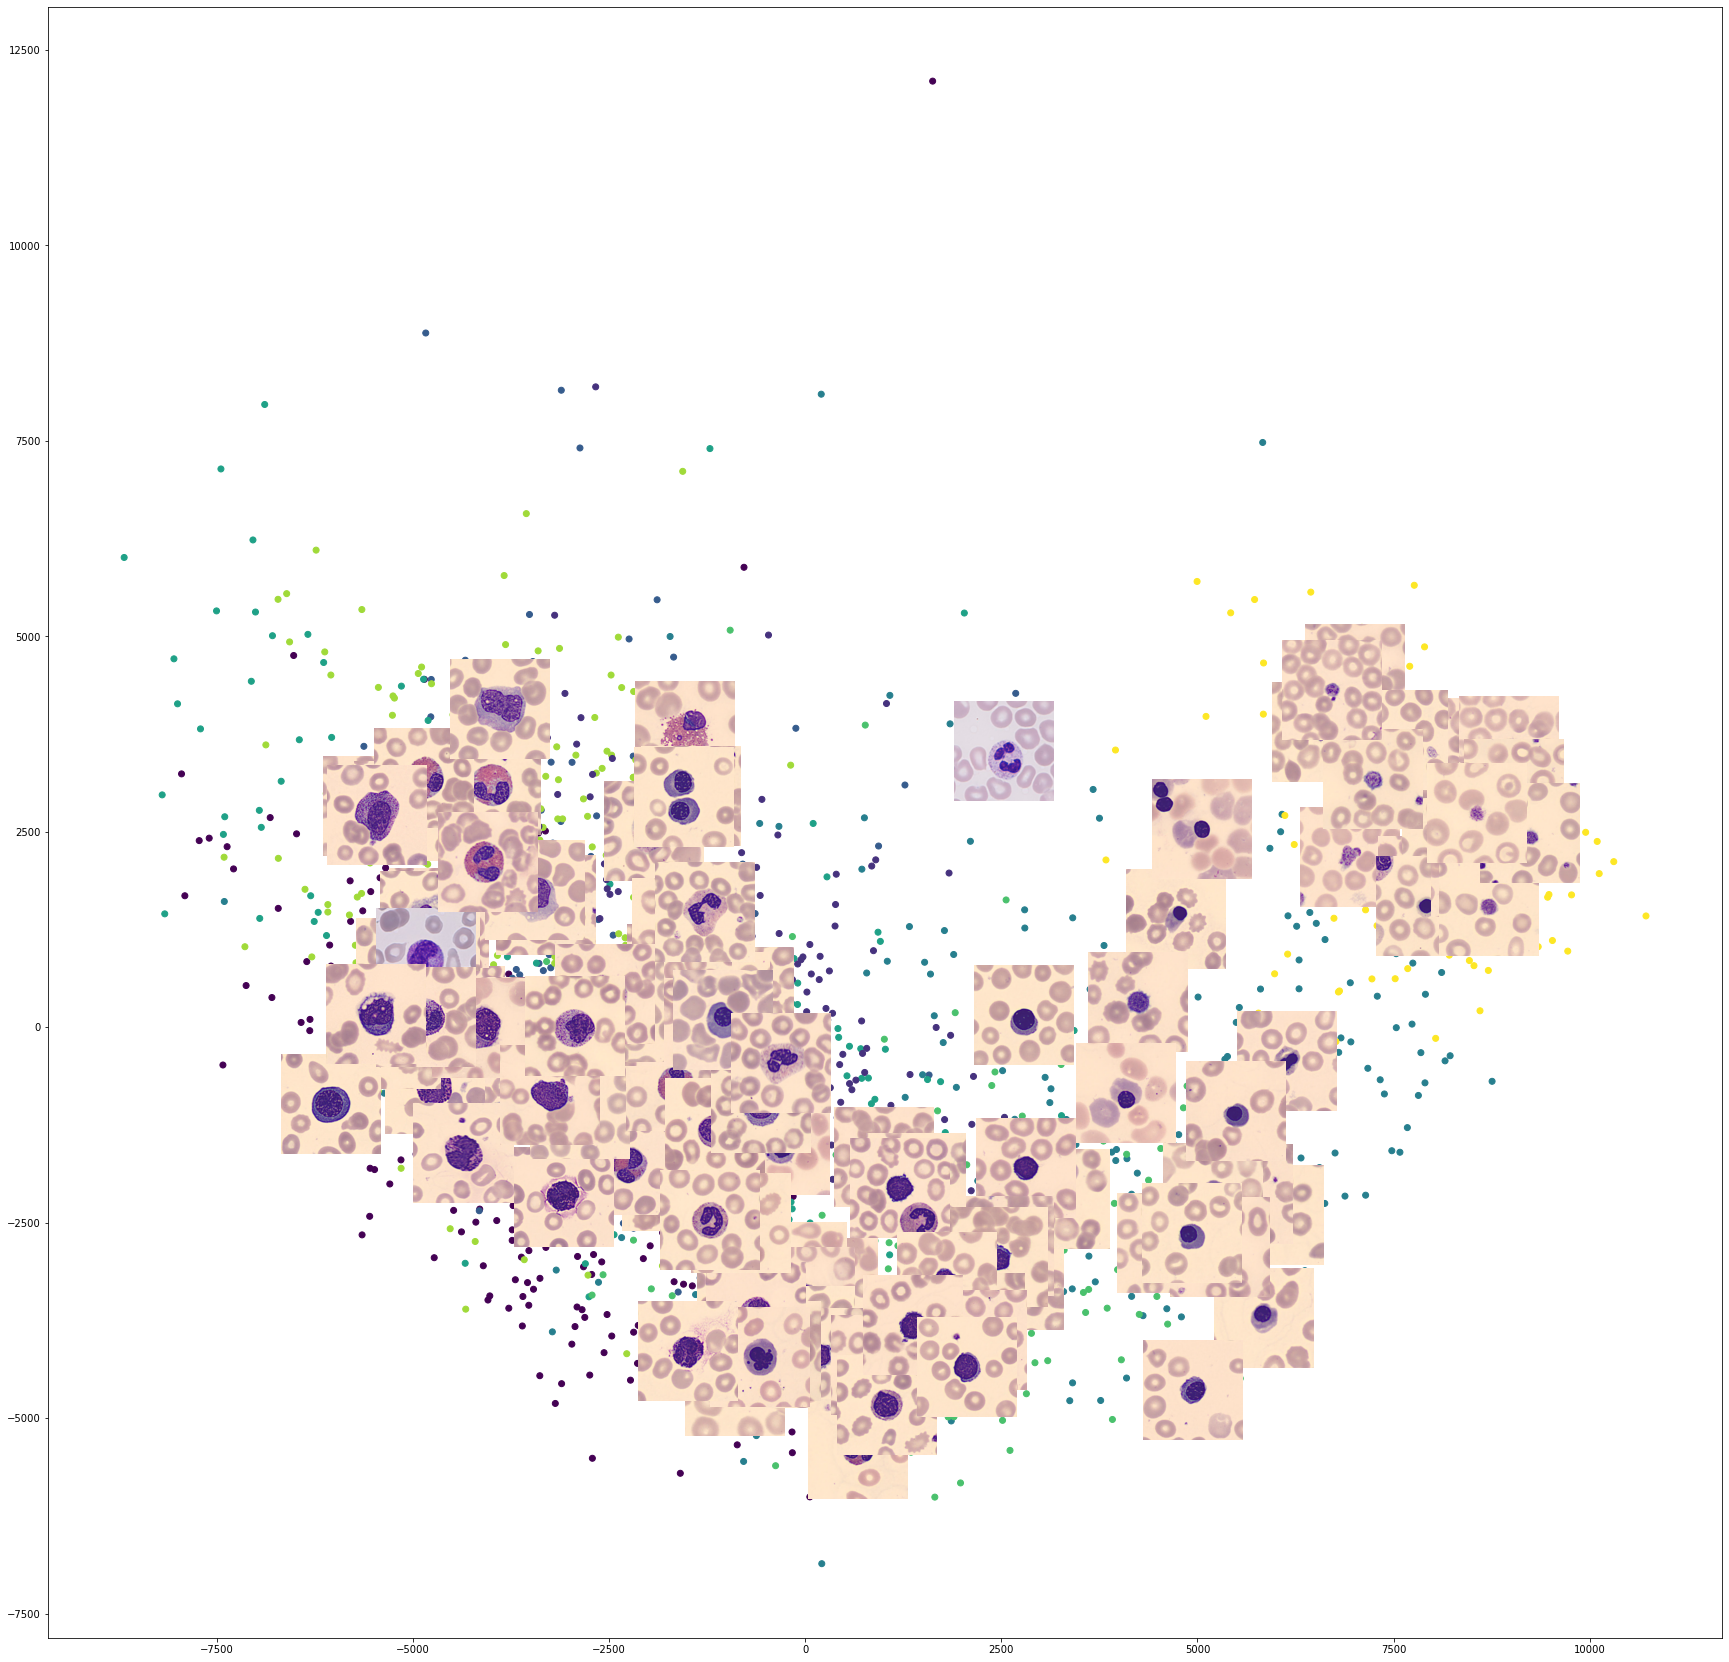

In [28]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(np.asarray(Image.open(path).resize((100,100))))



paths = sample2.path
x1=np.array(sample2.X)
y1=np.array(sample2.Y)


x = X_pca[:, 0]
y = X_pca[:, 1]

fig, ax = plt.subplots(figsize=(30, 30))
ax.scatter(x, y, c=target) 

for x0, y0, path in zip(x1, y1,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_lda = lda.fit_transform(df_data,target)
sample['X_lda'] = X_lda[:, 0]
sample['Y_lda'] = X_lda[:, 1]
sample2 = sample.sample(frac=0.05)

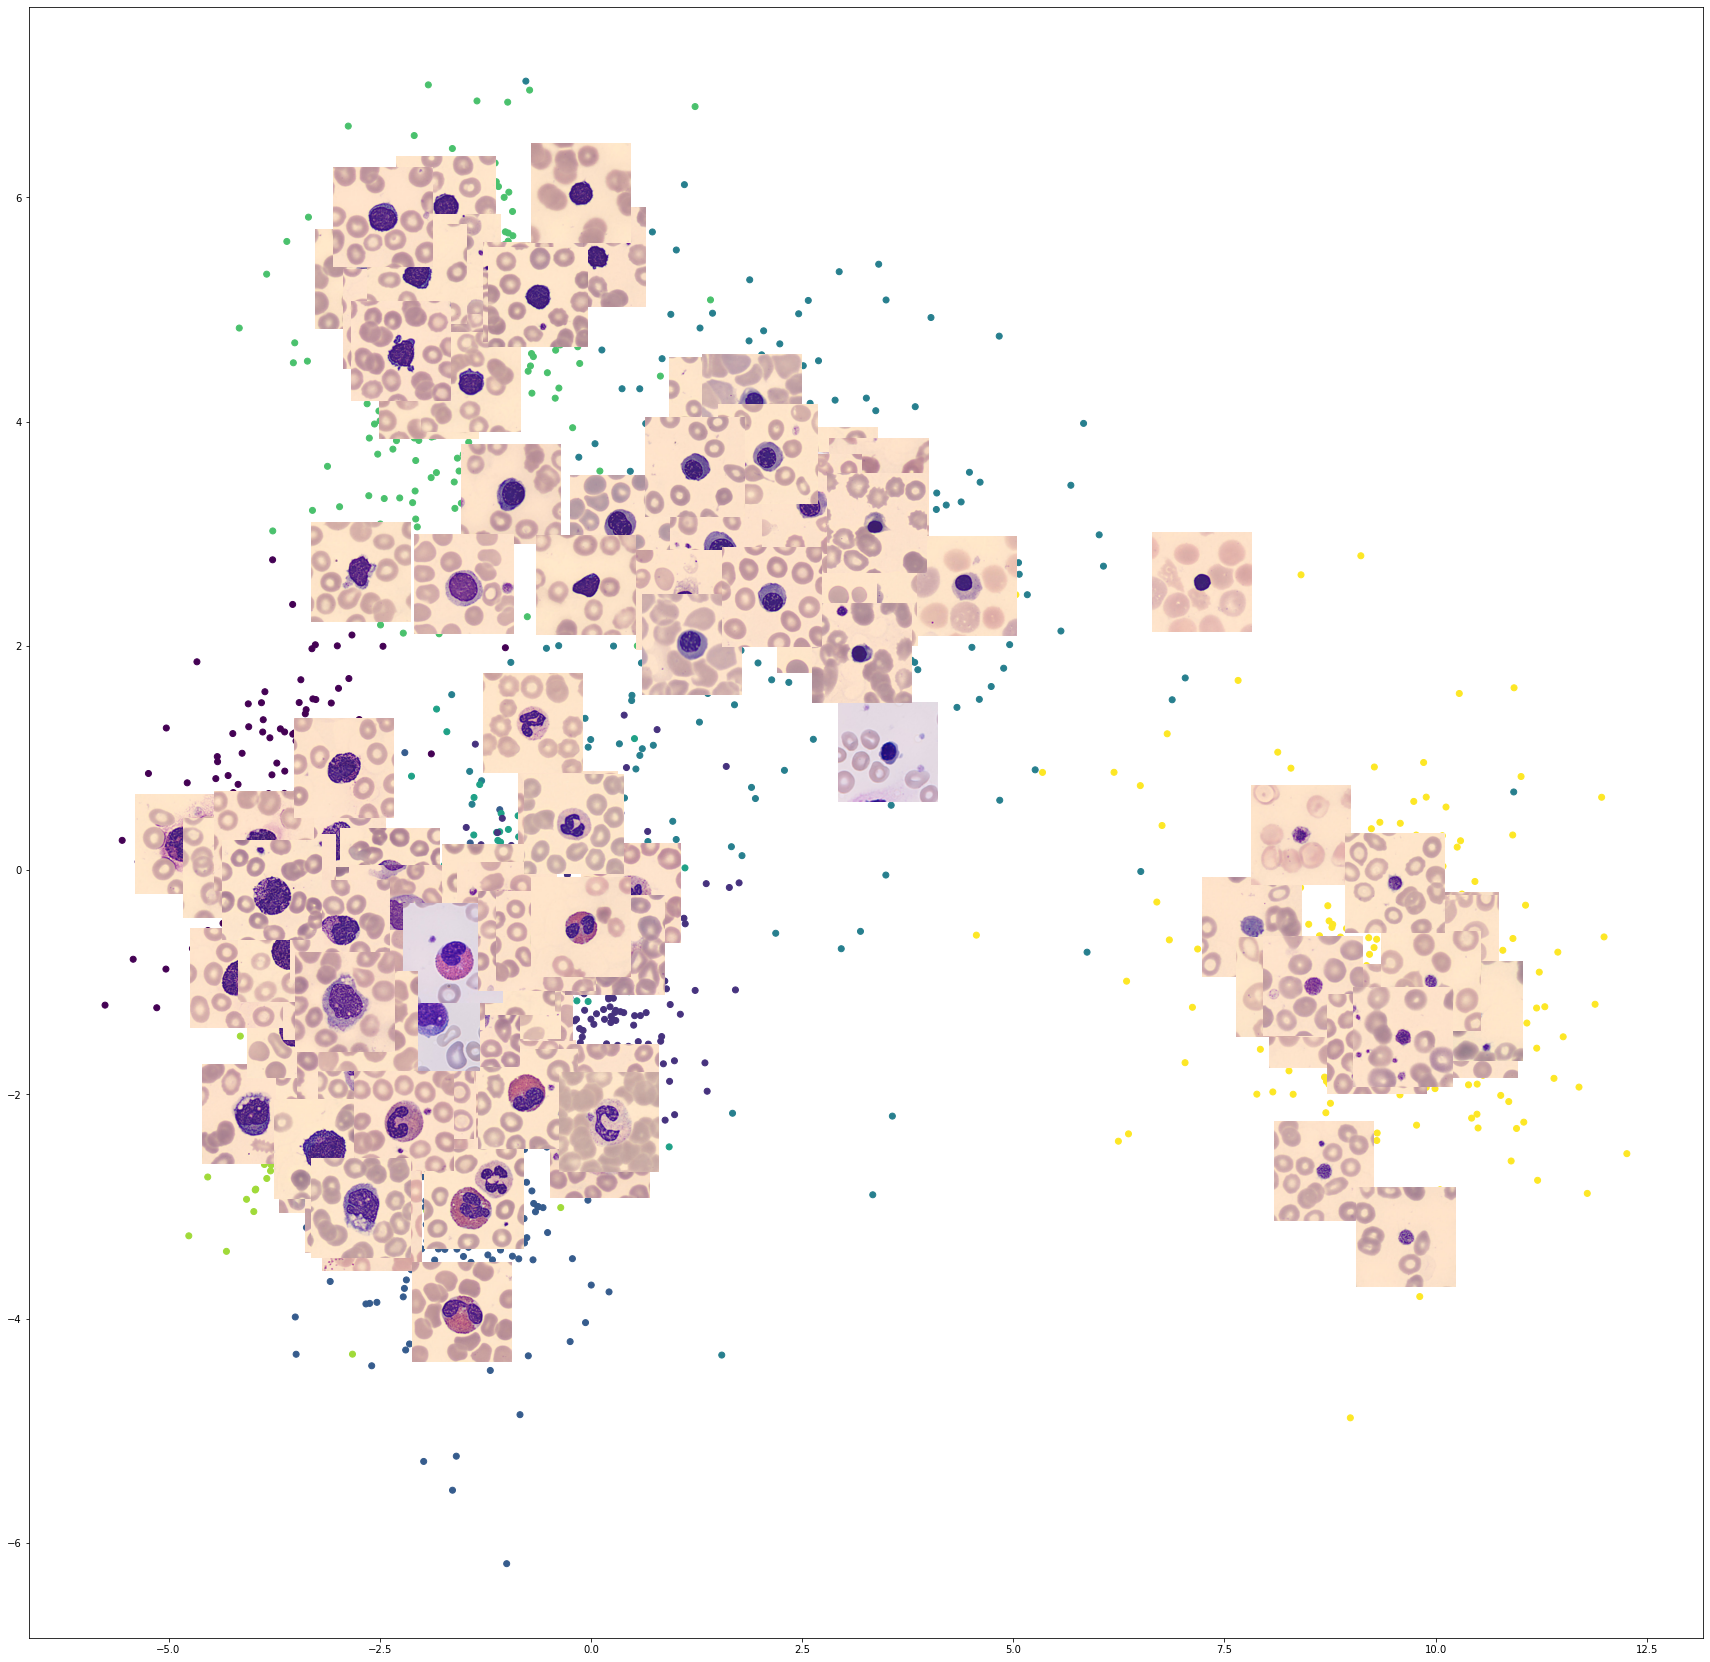

In [30]:
def getImage(path):
    return OffsetImage(np.asarray(Image.open(path).resize((100,100))))



paths = sample2.path
x1=np.array(sample2.X_lda)
y1=np.array(sample2.Y_lda)


x = X_lda[:, 0]
y = X_lda[:, 1]

fig, ax = plt.subplots(figsize=(30, 30))
ax.scatter(x, y, c=target) 
for x0, y0, path in zip(x1, y1,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)


In [31]:
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE
tsne = TSNE(n_components=2, method = 'barnes_hut')
dataTSNE = tsne.fit_transform(df_data)


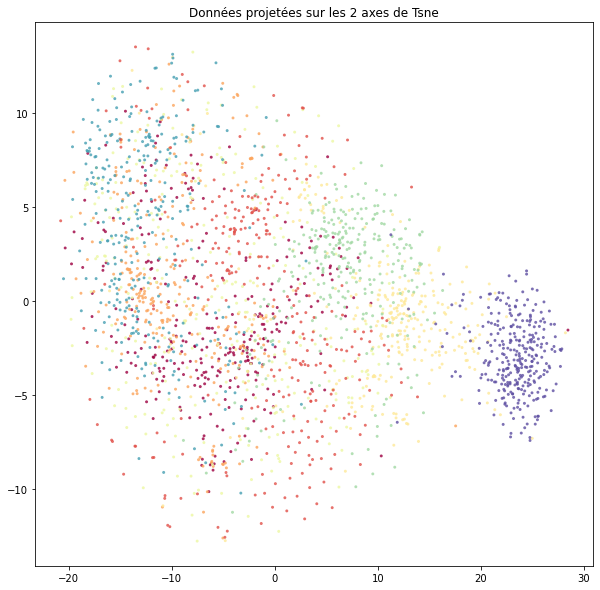

In [35]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111)
ax.scatter(dataTSNE[:, 0], dataTSNE[:, 1],  c = target, cmap=plt.cm.Spectral, alpha = .7, s = 4)

ax.set_title("Données projetées sur les 2 axes de Tsne")
plt.show();